In [204]:
import Pkg; Pkg.add(["Plots", "SQLite", "DBInterface", "DataFrames", "Statistics", "StatsBase", "Distributions", "Kaleido"])

   Resolving package versions...
   Installed SymPy ────────────── v2.2.2
   Installed PreallocationTools ─ v0.4.25
   Installed DynamicPolynomials ─ v0.5.7
   Installed Polynomials ──────── v3.2.4
   Installed LabelledArrays ───── v1.16.0
   Installed SymbolicUtils ────── v1.7.1
   Installed DomainSets ───────── v0.6.7
   Installed Symbolics ────────── v5.14.1
   Installed SymPyCore ────────── v0.2.9
   Installed Kaleido ──────────── v0.2.7
   Installed AbstractAlgebra ──── v0.34.7
   Installed Groebner ─────────── v0.5.1
    Updating `~/.julia/environments/v1.10/Project.toml`
  [caafb194] + Kaleido v0.2.7
⌃ [24249f21] ↓ SymPy v2.3.3 ⇒ v2.2.2
⌃ [0c5d862f] ↓ Symbolics v6.30.0 ⇒ v5.14.1
    Updating `~/.julia/environments/v1.10/Manifest.toml`
⌅ [c3fe647b] + AbstractAlgebra v0.34.7
⌅ [187b0558] ↓ ConstructionBase v1.5.8 ⇒ v1.5.6
⌅ [5b8099bc] ↓ DomainSets v0.7.15 ⇒ v0.6.7
⌅ [7c1d4256] ↓ DynamicPolynomials v0.6.1 ⇒ v0.5.7
⌅ [0b43b601] + Groebner v0.5.1
⌅ [d5909c97] + GroupsCore v0.4.2
  [c

In [87]:
using SQLite, DBInterface, DataFrames

# Connect to SQLite database
db = SQLite.DB("app-prod.sqlite")

SQLite.DB("app-prod.sqlite")

In [88]:
using Plots, ColorSchemes
plotly()

Plots.PlotlyBackend()

In [89]:
df_total = DataFrame(DBInterface.execute(db, """
        SELECT * from LibraryLogs"""
))

Row,id,roll_number,in_time,out_time,time_spent
,Int64,String,String,String?,Float64
1,1,AI21BTECH11005,2024-10-24 20:11:01,2024-10-24 20:43:30,32.0
2,2,AI21BTECH11005,2024-10-24 22:48:17,2024-10-24 23:37:24,49.0
3,3,AI21BTECH11005,2024-10-25 20:58:29,2024-10-25 20:59:29,1.0
4,4,AI21BTECH11005,2024-10-26 09:23:25,2024-10-26 12:51:39,208.0
5,5,AI21BTECH11005,2024-10-26 13:26:40,2024-10-26 16:02:14,155.0
6,6,AI21BTECH11005,2024-10-26 17:53:23,2024-10-26 18:45:16,51.0
7,7,AI21BTECH11005,2024-10-26 20:49:35,2024-10-26 21:24:47,35.0
8,8,AI21BTECH11005,2024-10-26 21:53:43,2024-10-26 22:58:27,64.0
9,9,AI21BTECH11005,2024-10-27 10:19:08,2024-10-27 12:57:00,157.0


In [90]:


# Query total time spent per person
df_person = DataFrame(DBInterface.execute(db, """
    SELECT 
        roll_number, 
        SUM(time_spent) AS total_minutes,
        printf('%d days, %02d hours, %02d minutes', 
            SUM(time_spent) / 1440,        
            (SUM(time_spent) % 1440) / 60,  
            (SUM(time_spent) % 60)         
        ) AS formatted_time
    FROM LibraryLogs
    WHERE roll_number LIKE '%23BTECH%'
    GROUP BY roll_number
    ORDER BY total_minutes DESC;
"""))

insertcols!(df_person, :days => df_person.total_minutes .÷ 1440)
insertcols!(df_person, :hours => (df_person.total_minutes .% 1440) .÷ 60)
insertcols!(df_person, :minutes => df_person.total_minutes .% 60)
# insertcols!(df_person, :serial_number => 1:nrow(df_person))
# df_person.serial_number = 1:nrow(df_person)

Row,roll_number,total_minutes,formatted_time,days,hours,minutes
,String,Float64,String,Float64,Float64,Float64
1,AI23BTECH11032,24597.0,"17 days, 01 hours, 57 minutes",17.0,1.0,57.01
2,AI23BTECH11003,24564.0,"17 days, 01 hours, 24 minutes",17.0,1.0,24.02
3,CS23BTECH11005,19173.0,"13 days, 07 hours, 32 minutes",13.0,7.0,32.95
4,EE23BTECH11051,17194.0,"11 days, 22 hours, 34 minutes",11.0,22.0,34.02
5,EE23BTECH11004,16047.3,"11 days, 03 hours, 27 minutes",11.0,3.0,27.27
6,ES23BTECH11036,13621.1,"9 days, 11 hours, 01 minutes",9.0,11.0,1.09
7,CO23BTECH11009,13397.0,"9 days, 07 hours, 17 minutes",9.0,7.0,17.01
8,CS23BTECH11056,13291.9,"9 days, 05 hours, 31 minutes",9.0,5.0,31.93
9,EE23BTECH11029,13287.6,"9 days, 05 hours, 27 minutes",9.0,5.0,27.63


In [148]:
twenty_fifth = Int(3*(532/4))
fiftieth = Int(532/2)
seventy_fifth = Int(532/4)
p25 = df_person[twenty_fifth, :total_minutes]
p50 = df_person[fiftieth, :total_minutes]
p75 = df_person[seventy_fifth, :total_minutes]


2663.34

In [149]:
PlotlyKaleido.start()

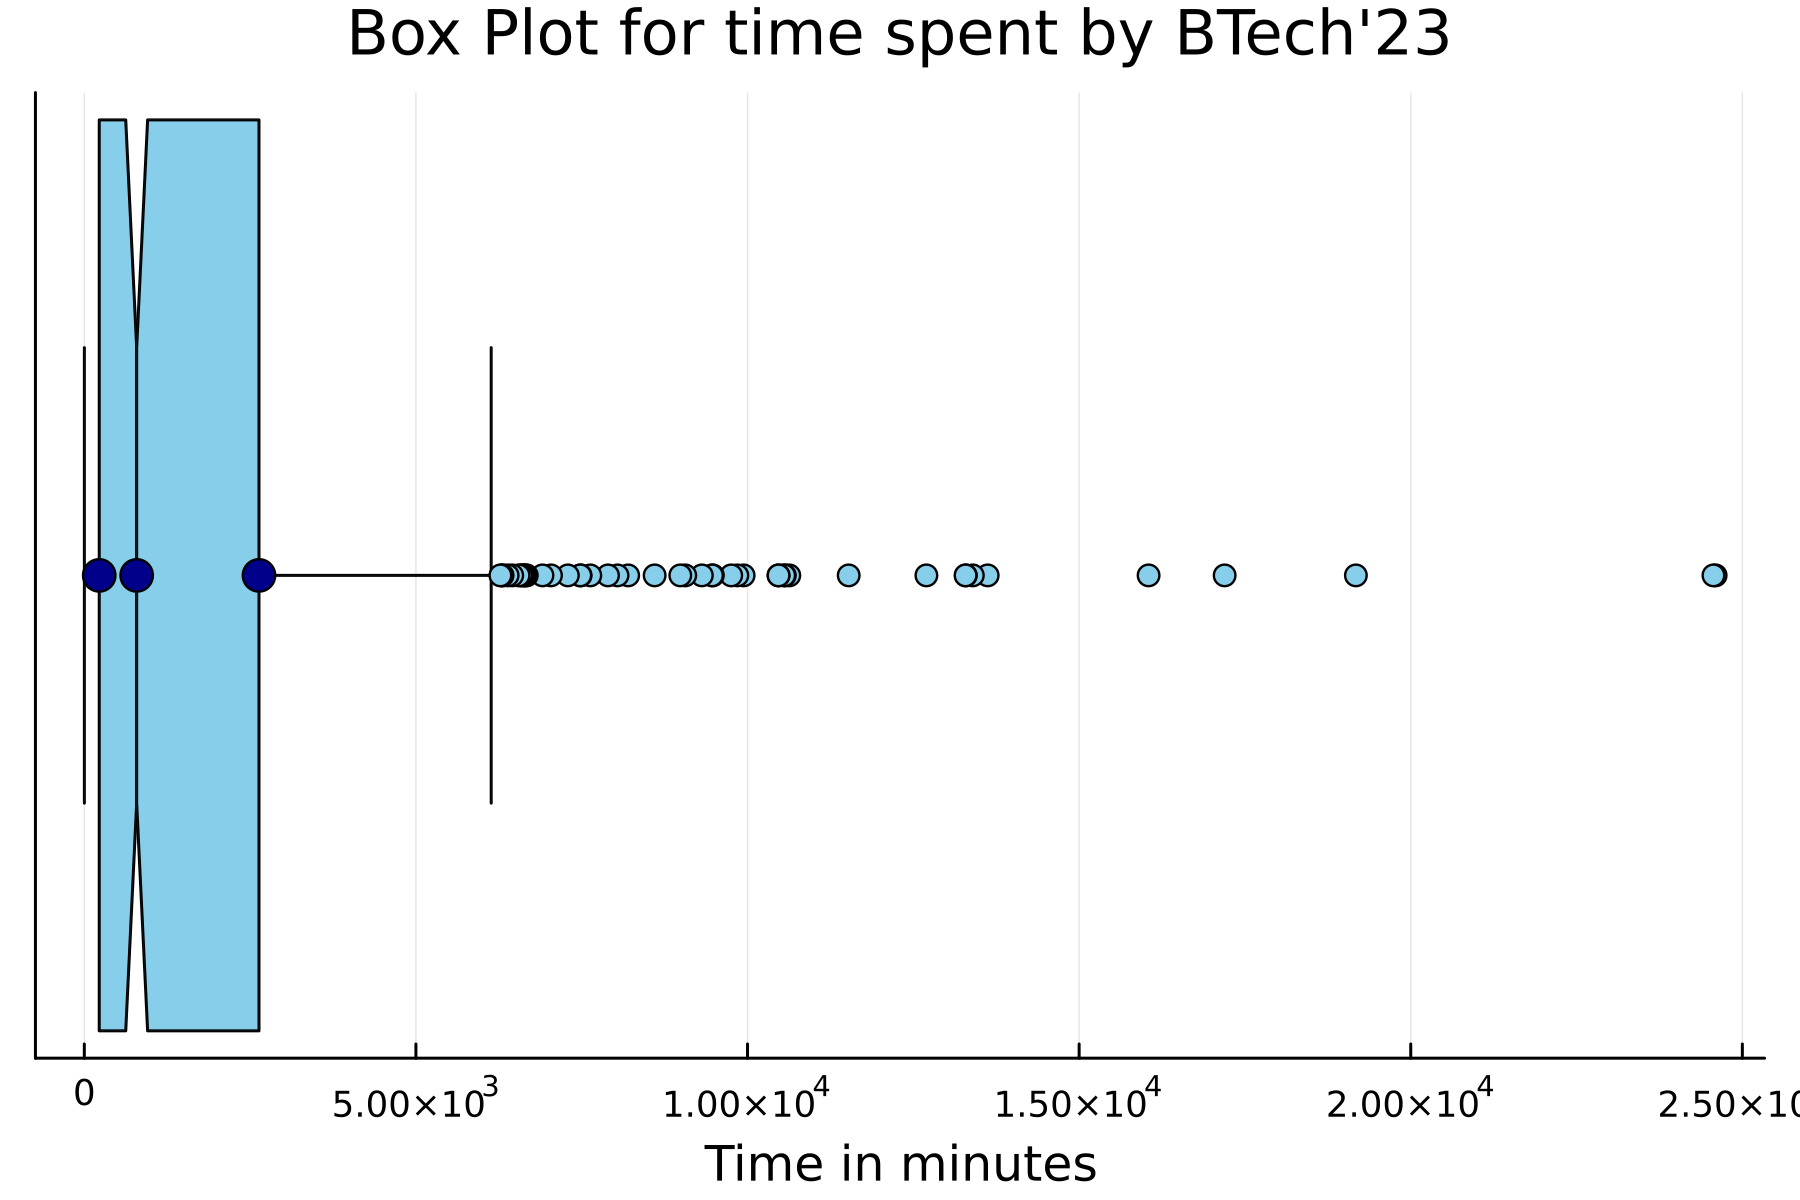

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/boxplot1.png"

In [163]:
using StatsPlots
gr()
data = df_person.total_minutes
p = boxplot(data, title="Box Plot for time spent by BTech'23", xlabel = "Time in minutes", orientation = :horizontal, legend=false, notch=true, color=:skyblue, yticks=false; dpi=300)
scatter!([p25, p50, p75], [1,1,1], markershape=:circle, markersize=6, label="Percentiles", color= :blue4)
display(p)
savefig(p, "boxplot1.png")

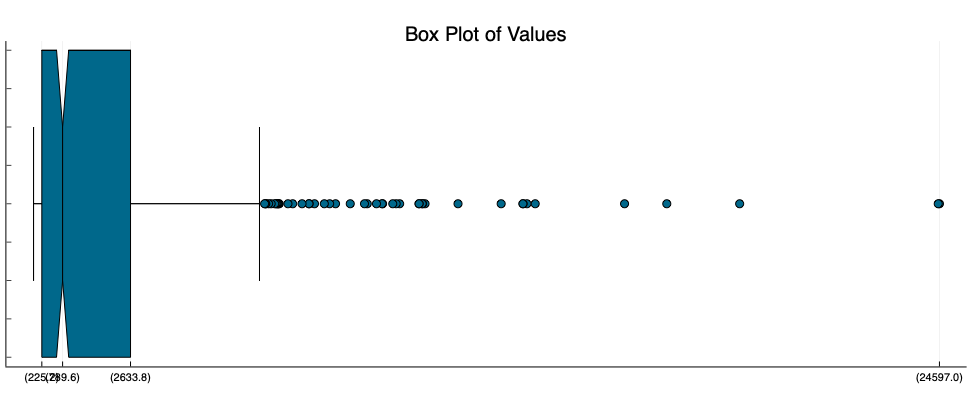

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/boxplot_updated.svg"

In [155]:
using StatsPlots, Plots

plotly()
data = df_person.total_minutes

# Compute quartiles and max
p25, p50, p75 = quantile(data, [0.25, 0.50, 0.75])
max_val = maximum(data)

# Create box plot without y-axis numbers
p = boxplot(data, title="Box Plot of Values", orientation=:horizontal, 
    legend=false, notch=true, color=:deepskyblue4, yticks=false, xticks=([p25, p50, p75, max_val], 
    ["($(round(p25, digits=1)))", "($(round(p50, digits=1)))", 
     "($(round(p75, digits=1)))", "($(round(max_val, digits=1)))"]))

display(p)
savefig(p, "boxplot_updated.svg")

In [94]:
df_department = DataFrame(DBInterface.execute(db, """
        SELECT 
    SUBSTR(roll_number, 1, INSTR(roll_number, '23BTECH') - 1) AS department,
    MAX(CAST(SUBSTR(roll_number, -2) AS INTEGER)) AS student_count,
    SUM(time_spent) / (60*96) AS total_hours_per_day
FROM LibraryLogs
WHERE strftime('%m', in_time) != '12'
GROUP BY department
ORDER BY total_hours_per_day DESC;"""
))

Row,department,student_count,total_hours_per_day
,String,Int64,Float64
1,,96,1267.0
2,EE,66,46.3606
3,AI,34,18.5728
4,CS,65,17.956
5,ES,38,14.8894
6,MS,35,13.9685
7,ME,65,13.8173
8,CH,45,12.024
9,CE,60,9.39145


In [95]:
df_department = df_department[2:end, :]

Row,department,student_count,total_hours_per_day
,String,Int64,Float64
1,EE,66,46.3606
2,AI,34,18.5728
3,CS,65,17.956
4,ES,38,14.8894
5,MS,35,13.9685
6,ME,65,13.8173
7,CH,45,12.024
8,CE,60,9.39145
9,EP,35,9.2405


In [96]:
df_department.total_hours_per_day ./ df_department.student_count

14-element Vector{Float64}:
 0.7024330808080809
 0.5462583741830066
 0.276246233974359
 0.3918271198830409
 0.39909880952380955
 0.21257313034188036
 0.2672008487654321
 0.15652421875
 0.2640141865079365
 0.2813034855769231
 0.28657652777777776
 0.21832604166666666
 0.12483756944444444
 0.08252673611111111

In [97]:
insertcols!(df_department, :avg_hours_per_day => df_department.total_hours_per_day ./ df_department.student_count)


Row,department,student_count,total_hours_per_day,avg_hours_per_day
,String,Int64,Float64,Float64
1,EE,66,46.3606,0.702433
2,AI,34,18.5728,0.546258
3,CS,65,17.956,0.276246
4,ES,38,14.8894,0.391827
5,MS,35,13.9685,0.399099
6,ME,65,13.8173,0.212573
7,CH,45,12.024,0.267201
8,CE,60,9.39145,0.156524
9,EP,35,9.2405,0.264014


In [98]:
typeof(:blues)

Symbol

In [99]:
custom_gradient = cgrad([:indigo, :teal], [0, 1])
custom_gradient2 = cgrad([:cyan, :navyblue], [0, 1])
custom_gradient_plasma = cgrad(:plasma)
custom_gradient_viridis = cgrad(:viridis)
custom_gradient_acton = cgrad(:acton)

blues_cm = get(ColorSchemes.Blues, range(0, 1, length=256))

# Reverse the colormap
blues_cm_reversed = reverse(blues_cm)

# Use the reversed colormap in cgrad
custom_gradient_blues = cgrad(blues_cm_reversed)

In [100]:
typeof(custom_gradient)

PlotUtils.ContinuousColorGradient

In [101]:
function custom_grad(cgrad, vector)
    return cgrad[LinRange(0,1, length(vector))]
end

custom_grad (generic function with 1 method)

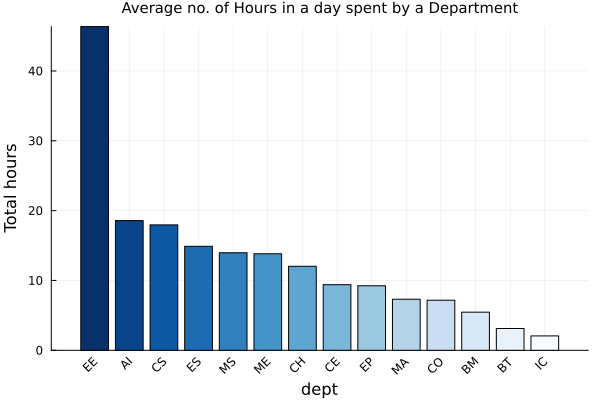

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Total Hours per department.svg"

In [102]:
gr()
p = bar(df_department.department, df_department.total_hours_per_day, 
     xlabel="dept", ylabel="Total hours", 
     title="Average no. of Hours in a day spent by a Department", titlefontsize=10,
     # color = custom_grad(custom_gradient, df_department.department),
     color = custom_grad(custom_gradient_blues, df_department.department),
     seriestype=:bar, 
     xrotation=45, leg=false)

display(p)
savefig(p, "Total Hours per department.svg")

In [103]:
sorted_departments

14-element Vector{String}:
 "EE"
 "AI"
 "MS"
 "ES"
 "CO"
 "MA"
 "CS"
 "CH"
 "EP"
 "BM"
 "ME"
 "CE"
 "BT"
 "IC"

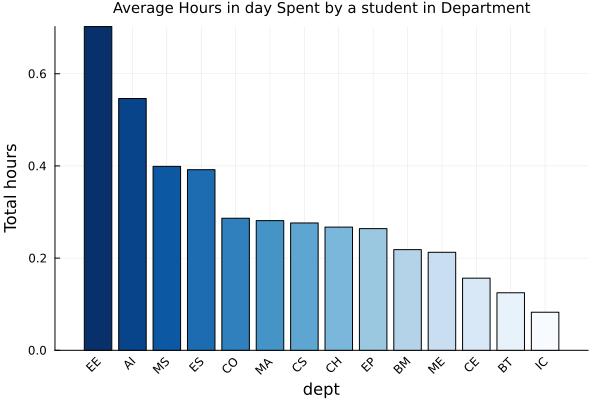

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Average Hours per department.svg"

In [104]:
sorted_avg_hours = sort(df_department.avg_hours_per_day, rev=true)
sorted_department_indices = sortperm(df_department.avg_hours_per_day, rev=true)
sorted_departments = df_department.department[sorted_department_indices, 1]
p = plot(sorted_departments, sorted_avg_hours,
     xlabel="dept", ylabel="Total hours", 
     title="Average Hours in day Spent by a student in Department", 
     color = custom_grad(custom_gradient_blues, df_department.department),
     seriestype=:bar, 
     titlefontsize=10,
     xrotation=45, leg=false)

display(p)
savefig(p, "Average Hours per department.svg")

In [105]:
df_available_programmes = DataFrame(DBInterface.execute(db, """
SELECT DISTINCT SUBSTR(roll_number, 5, LENGTH(roll_number) - 9) AS student_type
FROM LibraryLogs;"""
))

Row,student_type
,String
1,BTECH
2,MTECH
3,RESCH
4,BDES
5,C010
6,C012
7,C021
8,C026
9,BTKMU


In [106]:
indices = findall(x -> x == "MSC", df_available_programmes.student_type)

Int64[]

In [185]:
df_programme = DataFrame(DBInterface.execute(db, """
        SELECT 
    CASE 
        WHEN roll_number LIKE '%BTECH%' THEN 'BTECH'
        WHEN roll_number LIKE '%MTECH%' THEN 'MTECH'
        WHEN roll_number LIKE '%RESCH%' THEN 'RESCH'
        WHEN roll_number LIKE '%MSC%' THEN 'MSC'

        ELSE 'OTHER'
    END AS program,
    SUM(time_spent) / 60 AS total_hours
FROM LibraryLogs
GROUP BY program
ORDER BY total_hours DESC;"""
))


Row,program,total_hours
,String,Float64
1,BTECH,68840.0
2,MTECH,48220.0
3,RESCH,15450.2
4,MSC,13661.6
5,OTHER,6235.65


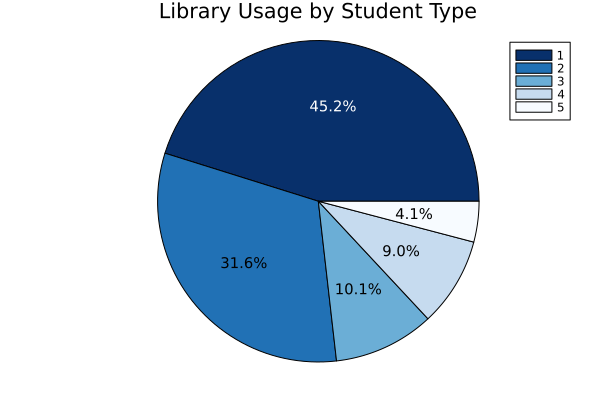

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Pie_chart.svg"

In [209]:
using StatsPlots, Plots

labels = df_programme.program
hours = df_programme.total_hours  # Data values

# Compute percentages
total = sum(hours)
percentages = hours ./ total .* 100
formatted_percentages = [string(round(p, digits=1), "%") for p in percentages]

# Define colors
num_colors = length(labels)  # Ensure we have enough colors
colors = custom_grad(custom_gradient_blues, labels)
# colors = custom_gradient2
# Generate pie chart (without legend)
gr()  # Use GR backend for better annotation support
p = pie(hours, title="Library Usage by Student Type", color=colors)

# Annotate percentage values inside slices
angles = cumsum(hours) .- hours ./ 2  # Compute approximate label positions
for i in 1:length(hours)
    x = 0.6 * cos(2π * angles[i] / total)  # Adjust the 0.6 factor if needed
    y = 0.6 * sin(2π * angles[i] / total)
    if i == 1
        annotate!(x, y, text(formatted_percentages[i], 10, :white, :center))
    else
        annotate!(x, y, text(formatted_percentages[i], 10, :black, :center))
    end
end

display(p)  # Show the plot
savefig(p, "Pie_chart.svg")

In [110]:
df_programme_count = DataFrame(DBInterface.execute(db, """
    SELECT 
        CASE 
            WHEN roll_number LIKE '%BTECH%' THEN 'BTECH'
            WHEN roll_number LIKE '%MTECH%' THEN 'MTECH'
            WHEN roll_number LIKE '%RESCH%' THEN 'RESCH'
            WHEN roll_number LIKE '%MSC%' THEN 'MSC'
            WHEN roll_number LIKE '%BDES%' THEN 'BDES'
            WHEN roll_number LIKE '%MDES%' THEN 'MDES'
            WHEN roll_number LIKE '%MA%' THEN 'MA'
            ELSE 'OTHER'
        END AS program,
        COUNT(DISTINCT roll_number) AS student_count
    FROM LibraryLogs
    GROUP BY program
    ORDER BY student_count DESC;
"""))

Row,program,student_count
,String,Int64
1,BTECH,1934
2,MTECH,916
3,RESCH,803
4,OTHER,243
5,MSC,204
6,BDES,83
7,MDES,54
8,MA,15


In [112]:
df_cumulative = DataFrame(DBInterface.execute(db, """
WITH DailyHours AS (
    SELECT 
        DATE(in_time) AS day,
        SUM(time_spent) / 60 AS daily_hours
    FROM LibraryLogs
    WHERE roll_number LIKE '%23BTECH%'  -- Filter for 23BTECH students
    GROUP BY day
),
CumulativeHours AS (
    SELECT 
        day,
        daily_hours,
        SUM(daily_hours) OVER (ORDER BY day) AS total_hours_upto_day
    FROM DailyHours
)
SELECT * FROM CumulativeHours;"""
))

Row,day,daily_hours,total_hours_upto_day
,String,Float64,Float64
1,2024-10-24,39.0,39.0
2,2024-10-25,151.0,190.0
3,2024-10-26,146.0,336.0
4,2024-10-27,137.0,473.0
5,2024-10-28,150.0,623.0
6,2024-10-29,112.718,735.718
7,2024-10-30,93.135,828.853
8,2024-10-31,69.9047,898.757
9,2024-11-01,106.165,1004.92


In [113]:
typeof(custom_gradient2[LinRange(0, 1, length(df_cumulative.day))])

Vector{RGBA{Float64}} (alias for Array{RGBA{Float64}, 1})

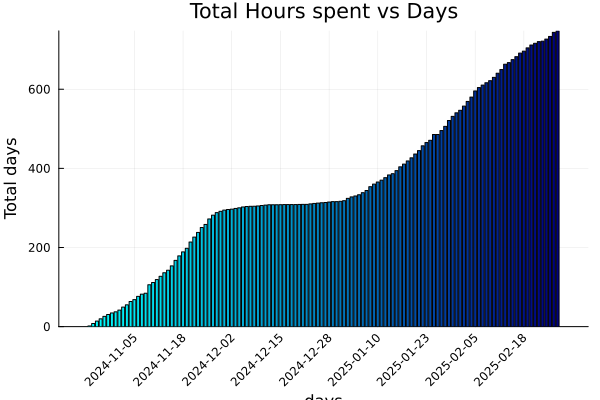

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Ogive.svg"

In [114]:
p = plot(df_cumulative.day, df_cumulative.total_hours_upto_day/24, 
     xlabel="days", ylabel="Total days", 
     title="Total Hours spent vs Days",
     color = custom_grad(custom_gradient2, df_cumulative.day),
     seriestype=:bar, 
     xrotation=45, leg=false)

display(p)
savefig(p, "Ogive.svg")

In [115]:
df_visitors = DataFrame(DBInterface.execute(db, """
SELECT DATE(in_time) AS visit_date, COUNT(DISTINCT roll_number) AS visitor_count
FROM LibraryLogs

GROUP BY visit_date
ORDER BY visit_date;"""
))

Row,visit_date,visitor_count
,String,Int64
1,2024-10-24,228
2,2024-10-25,526
3,2024-10-26,416
4,2024-10-27,359
5,2024-10-28,614
6,2024-10-29,516
7,2024-10-30,410
8,2024-10-31,99
9,2024-11-01,316


In [116]:
df_visitors_sorted = DataFrame(DBInterface.execute(db, """
SELECT DATE(in_time) AS visit_date, COUNT(DISTINCT roll_number) AS visitor_count
FROM LibraryLogs

GROUP BY visit_date
ORDER BY visitor_count DESC;"""
))

Row,visit_date,visitor_count
,String,Int64
1,2024-11-09,803
2,2024-11-21,695
3,2024-11-20,682
4,2024-11-18,680
5,2024-11-19,618
6,2025-02-17,617
7,2024-11-22,616
8,2025-01-29,615
9,2024-10-28,614


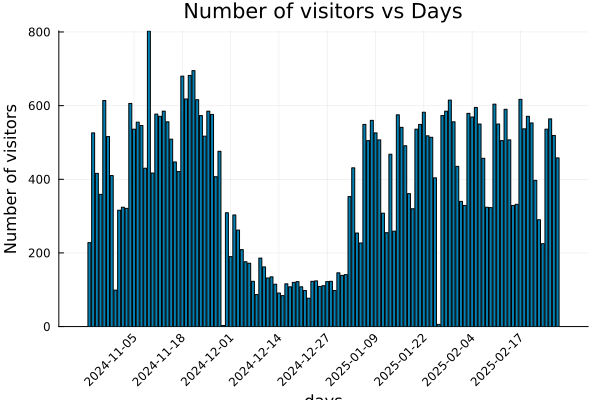

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Number of visitors vs days.svg"

In [117]:
p = plot(df_visitors.visit_date, df_visitors.visitor_count,
     xlabel="days", ylabel="Number of visitors", 
     title="Number of visitors vs Days", 
     seriestype=:bar, 
     xrotation=45, leg=false, color=RGB(0, 0.5, 0.7))
display(p)
savefig(p, "Number of visitors vs days.svg")

In [118]:
maximum(df_visitors.visitor_count)

803

In [119]:
df_days = DataFrame(DBInterface.execute(db, """
        SELECT 
    strftime('%w', in_time) AS day_of_week, 
    CASE 
        WHEN strftime('%w', in_time) = '0' THEN 'Sunday'
        WHEN strftime('%w', in_time) = '1' THEN 'Monday'
        WHEN strftime('%w', in_time) = '2' THEN 'Tuesday'
        WHEN strftime('%w', in_time) = '3' THEN 'Wednesday'
        WHEN strftime('%w', in_time) = '4' THEN 'Thursday'
        WHEN strftime('%w', in_time) = '5' THEN 'Friday'
        WHEN strftime('%w', in_time) = '6' THEN 'Saturday'
    END AS day_name,
    COUNT(DISTINCT roll_number || DATE(in_time)) AS total_visitors
FROM LibraryLogs
WHERE strftime('%m', in_time) != '12'
GROUP BY day_of_week
ORDER BY total_visitors DESC;"""
))

Row,day_of_week,day_name,total_visitors
,String,String,Int64
1,1,Monday,7524
2,3,Wednesday,7302
3,4,Thursday,7245
4,2,Tuesday,6935
5,5,Friday,6139
6,6,Saturday,5482
7,0,Sunday,4052


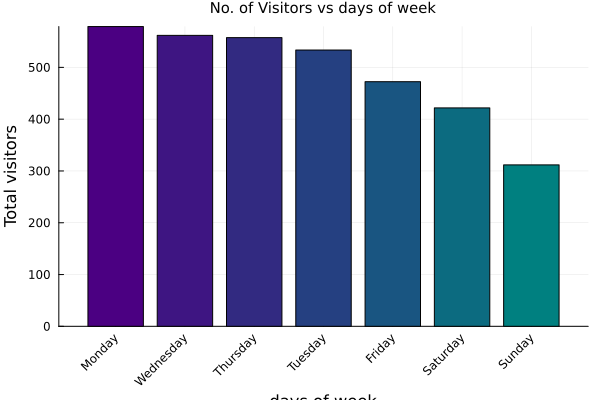

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Visitors vs days of week.svg"

In [120]:
p = plot(df_days.day_name, df_days.total_visitors/(97÷7), 
     xlabel="days of week", ylabel="Total visitors", 
     title="No. of Visitors vs days of week", 
     titlefontsize=10,
     seriestype=:bar,
     color = custom_grad(custom_gradient, df_days.day_name),
     xrotation=45, leg=false)

display(p)
savefig(p, "Visitors vs days of week.svg")

In [121]:
using Statistics
using StatsBase
mean_visitors = mean(df_visitors.visitor_count)
median_visitors = median(df_visitors.visitor_count)
mode_visitors = mode(df_visitors.visitor_count)
std_visitors = std(df_visitors.visitor_count)
println("Mean: ", mean_visitors)
println("STD: ", std_visitors)
println("Median: ", median_visitors)
println("Mode: ", mode_visitors)

Mean: 385.43307086614175
STD: 191.95099368589598
Median: 421.0
Mode: 123


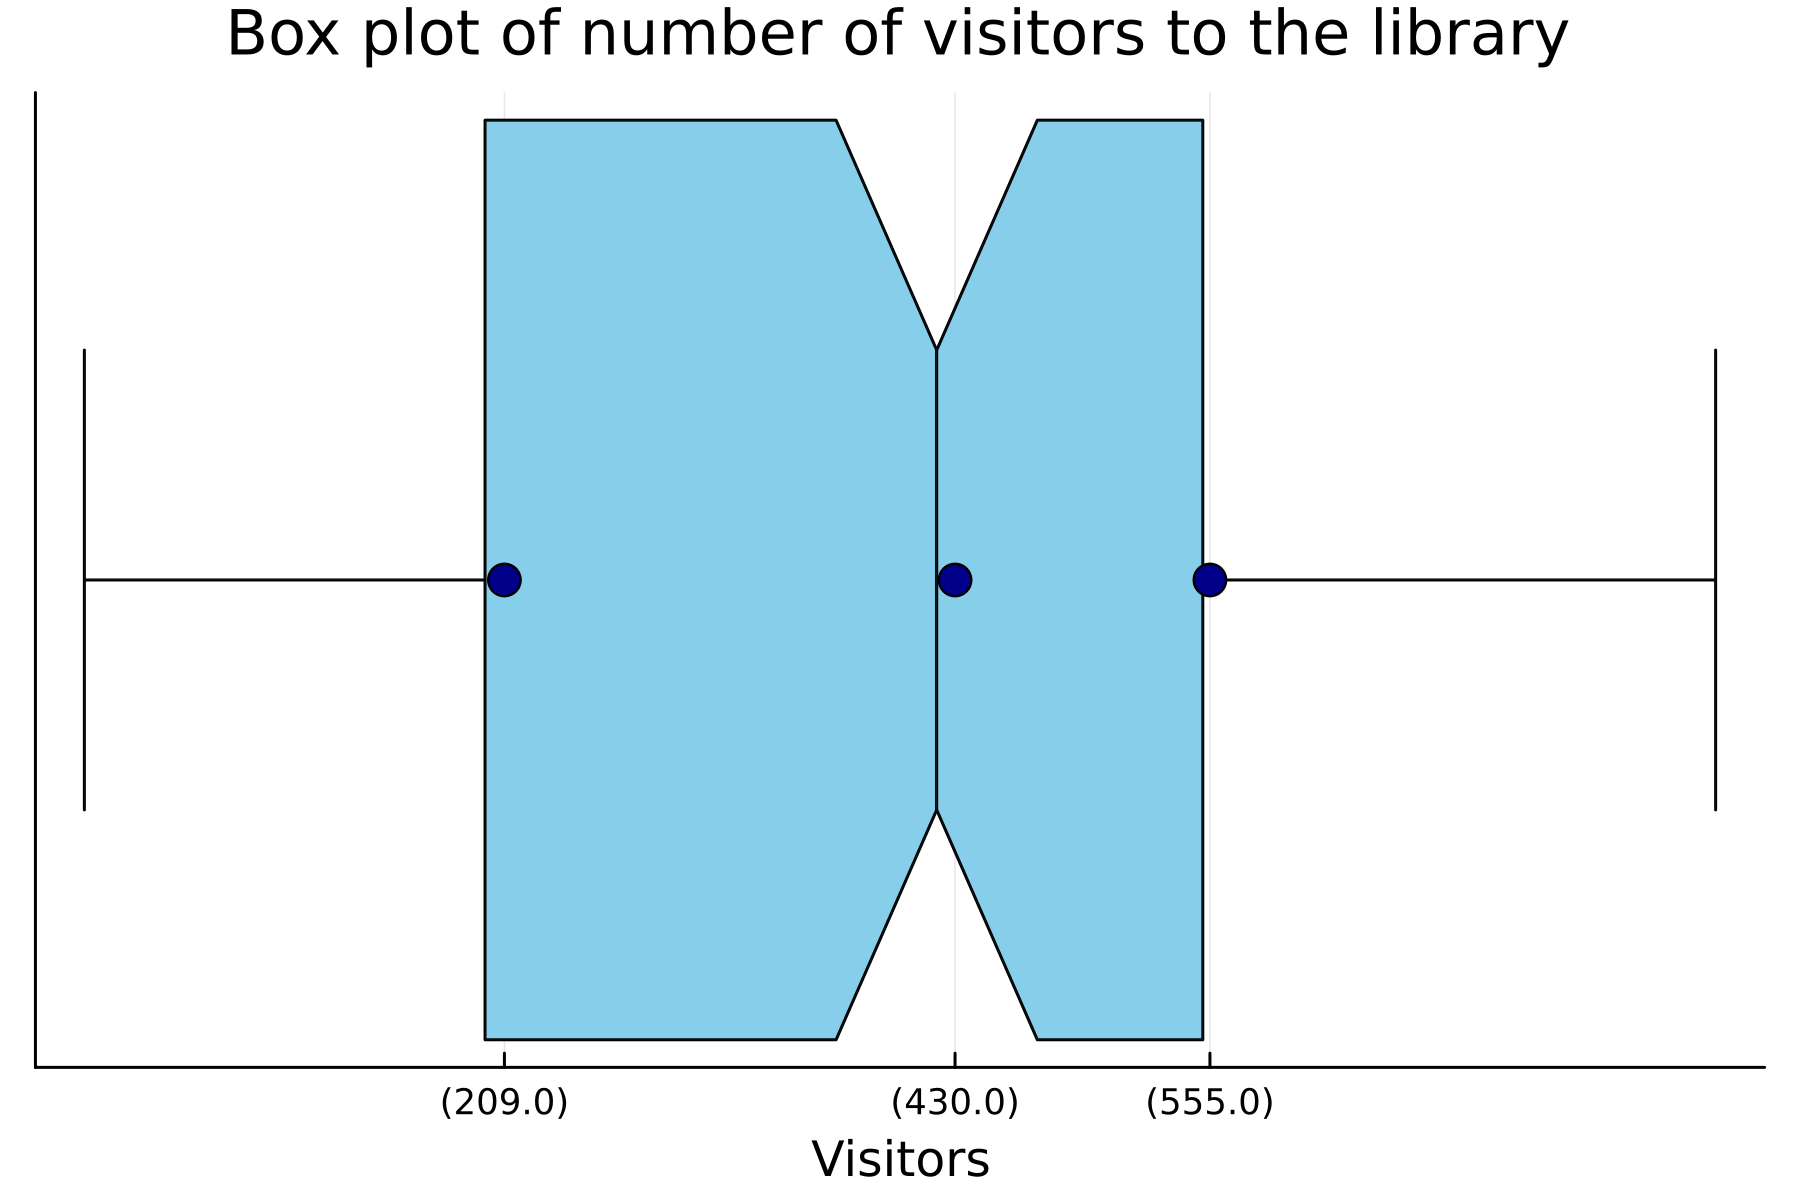

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Box plot 2.png"

In [171]:
using Plots
gr()

twenty_fifth = (3*length(df_visitors_sorted.visitor_count))÷ 4
fiftieth = (2*length(df_visitors_sorted.visitor_count))÷ 4
seventy_fifth = (length(df_visitors_sorted.visitor_count))÷ 4
p25 = df_visitors_sorted[twenty_fifth, :visitor_count]
p50 = df_visitors_sorted[fiftieth, :visitor_count]
p75 = df_visitors_sorted[seventy_fifth, :visitor_count]
visitor_count = df_visitors.visitor_count
p = boxplot(visitor_count, orientation=:horizontal, title="Box plot of number of visitors to the library", xlabel="Visitors",
    notch = true, color = :skyblue, legend=false, yticks=false,
     xticks=([p25, p50, p75], 
    ["($(round(p25, digits=1)))", "($(round(p50, digits=1)))", 
     "($(round(p75, digits=1)))"]); dpi=300)
scatter!([p25, p50, p75], [1,1,1], markershape=:circle, markersize=6, label="Percentiles", color= :blue4)

display(p)
savefig(p, "Box plot 2.png")

In [123]:
df_Deekshith = DataFrame(DBInterface.execute(db, """
WITH AllDates AS (
    SELECT DATE(in_time) AS date
    FROM LibraryLogs
    WHERE roll_number = 'AI23BTECH11003'
    UNION
    SELECT DISTINCT DATE(in_time)
    FROM LibraryLogs
),
PersonData AS (
    SELECT DATE(in_time) AS date, SUM(time_spent) / 60 AS total_hours
    FROM LibraryLogs
    WHERE roll_number = 'AI23BTECH11003'
    GROUP BY DATE(in_time)
)
SELECT A.date, COALESCE(P.total_hours, 0) AS total_hours
FROM AllDates A
LEFT JOIN PersonData P ON A.date = P.date
WHERE strftime('%m', A.date) != '12'  -- Exclude December
ORDER BY A.date;"""
))

Row,date,total_hours
,String,Float64
1,2024-10-24,0.0
2,2024-10-25,5.0
3,2024-10-26,3.0
4,2024-10-27,6.0
5,2024-10-28,4.0
6,2024-10-29,4.7425
7,2024-10-30,4.95817
8,2024-10-31,5.12333
9,2024-11-01,0.0


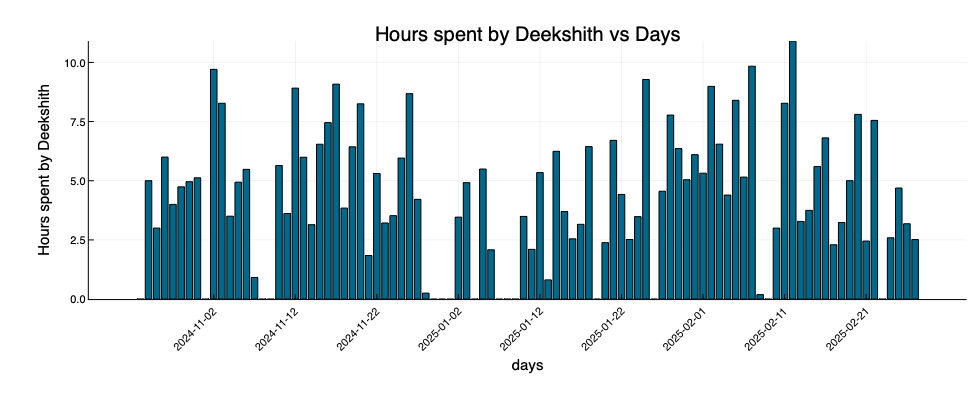

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Hours spent by Deekshith vs days.svg"

In [124]:
p = plot(df_Deekshith.date, df_Deekshith.total_hours,
     xlabel="days", ylabel="Hours spent by Deekshith", 
     title="Hours spent by Deekshith vs Days", 
     seriestype=:bar, 
     xrotation=45, leg=false, color=:deepskyblue4)
display(p)
savefig(p, "Hours spent by Deekshith vs days.svg")

In [125]:
maximum(df_Deekshith.total_hours)

10.9025

In [126]:
df_days_Deekshith = DataFrame(DBInterface.execute(db, """
        SELECT 
    strftime('%w', in_time) AS day_of_week, 
    CASE 
        WHEN strftime('%w', in_time) = '0' THEN 'Sunday'
        WHEN strftime('%w', in_time) = '1' THEN 'Monday'
        WHEN strftime('%w', in_time) = '2' THEN 'Tuesday'
        WHEN strftime('%w', in_time) = '3' THEN 'Wednesday'
        WHEN strftime('%w', in_time) = '4' THEN 'Thursday'
        WHEN strftime('%w', in_time) = '5' THEN 'Friday'
        WHEN strftime('%w', in_time) = '6' THEN 'Saturday'
    END AS day_name,
    SUM(time_spent) / 60 AS total_hours
FROM LibraryLogs
WHERE roll_number like 'AI24BTECH11014'
GROUP BY day_of_week
ORDER BY total_hours DESC;"""
))



Row,day_of_week,day_name,total_hours
,String,String,Float64
1,3,Wednesday,32.6892
2,1,Monday,20.1485
3,4,Thursday,18.6505
4,5,Friday,17.8188
5,6,Saturday,17.1995
6,0,Sunday,15.582
7,2,Tuesday,12.9418


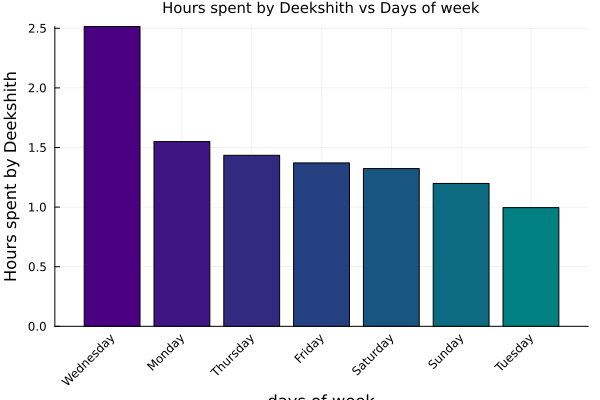

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Hours spent by Deekshith vs days of week.svg"

In [127]:
gr()
p = plot(df_days_Deekshith.day_name, df_days_Deekshith.total_hours/(97÷7),
     xlabel="days of week", ylabel="Hours spent by Deekshith", 
     title="Hours spent by Deekshith vs Days of week", 
     titlefontsize=10,
     seriestype=:bar, 
     xrotation=45, leg=false, color = custom_grad(custom_gradient, df_days_Deekshith.day_name))

display(p)
savefig(p, "Hours spent by Deekshith vs days of week.svg")

In [128]:
using Statistics
mean_hours = mean(df_Deekshith.total_hours) # he visited the library 82 out of the 96 days he's been here
std_hours = std(df_Deekshith.total_hours)
println(std_hours)

2.8583956904332246


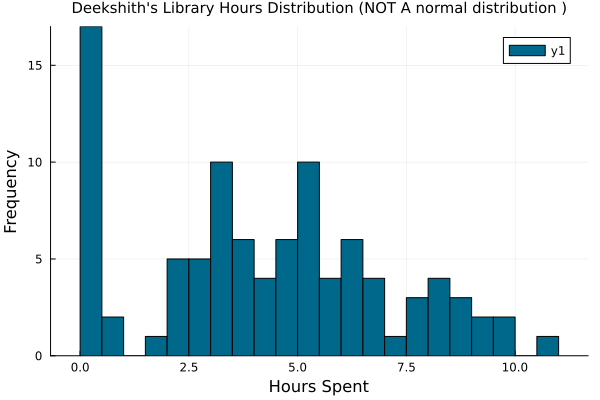

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Deekshith's histogram.svg"

In [129]:
p = histogram(df_Deekshith.total_hours, bins=20, xlabel="Hours Spent", ylabel="Frequency",
    title="Deekshith's Library Hours Distribution (NOT A normal distribution )",
    titlefontsize=10,
    color=:deepskyblue4)

display(p)
savefig(p, "Deekshith's histogram.svg")

In [130]:
df_Deekshith.total_hours

96-element Vector{Float64}:
 0.0
 5.0
 3.0
 6.0
 4.0
 4.742500000000001
 4.958166666666667
 5.123333333333333
 0.0
 9.705666666666666
 8.274166666666666
 3.5021666666666667
 4.9398333333333335
 ⋮
 6.8105
 2.294
 3.2328333333333332
 5.0023333333333335
 7.803833333333333
 2.4515000000000002
 7.549499999999999
 0.0
 2.5891666666666664
 4.691833333333333
 3.1816666666666666
 2.5146666666666664

In [131]:
sample_means = Float64[]
sample_vars = Float64[]
sample_length = 30
for i in 1:1000
    sampled_hours = sample(df_Deekshith.total_hours, sample_length)
    sample_mean = mean(sampled_hours)
    sample_var = var(sampled_hours)
    push!(sample_means, sample_mean)
    push!(sample_vars, sample_var)
end

In [132]:
mean(sample_means), std(sample_means)

(4.208704805555555, 0.5100524328008054)

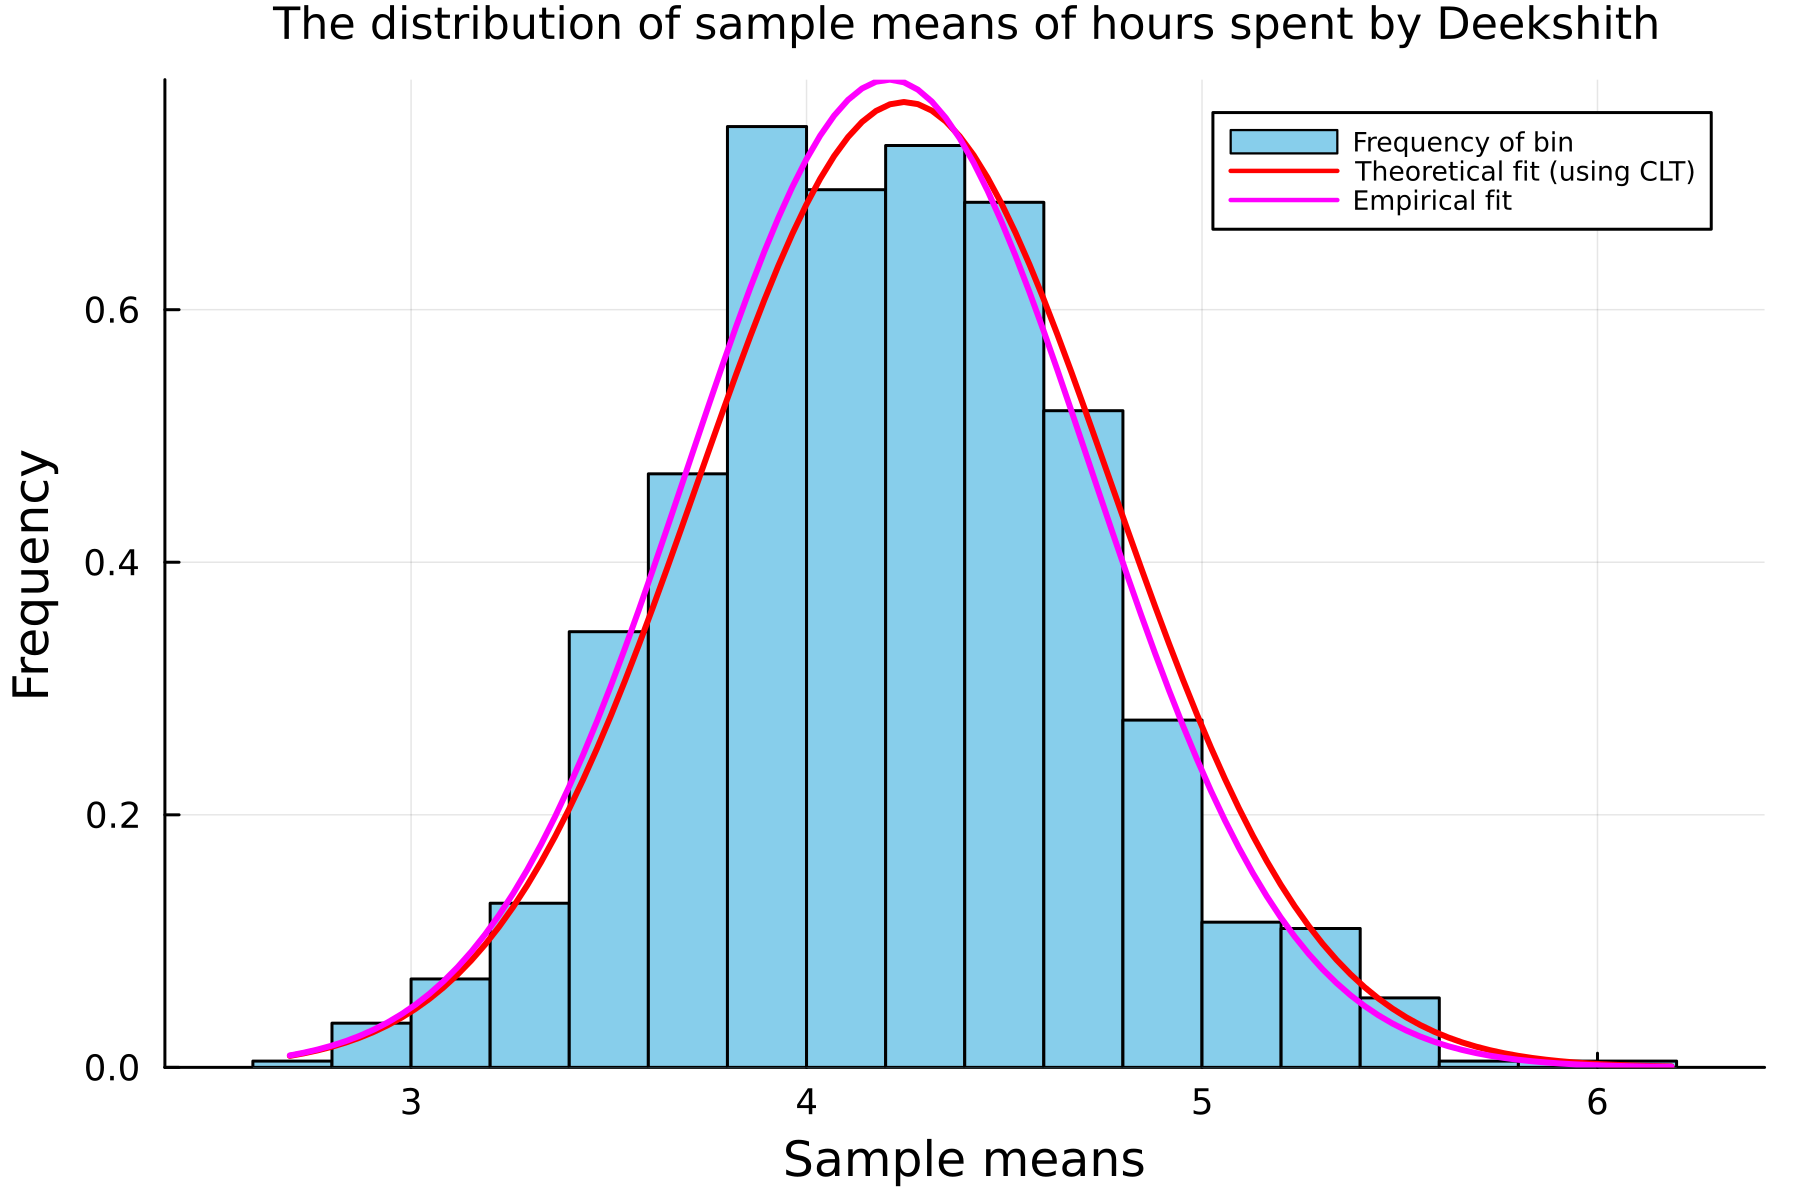

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Distribution of sample means of hours.png"

In [183]:
using Distributions
p = histogram(sample_means, bins=30, xlabel="Sample means", ylabel="Frequency",
    title="The distribution of sample means of hours spent by Deekshith",
    titlefontsize=10,
    normalize=true,
    color=:skyblue,
    legend = :topright, label= "Frequency of bin", legendfontsize=6; dpi=300)
scale_factor = (sample_length)^0.5
μ, σ = mean_hours, std_hours/scale_factor # pop mean and pop var
μ_hat, σ_hat = mean(sample_means), std(sample_means)
x = range(minimum(sample_means), maximum(sample_means), length=100)
pdf_vals = pdf.(Normal(μ, σ), x)
pdf_vals_emp = pdf.(Normal(μ_hat, σ_hat), x)

# Overlay the normal distribution
plot!(x, pdf_vals, label="Theoretical fit (using CLT)", lw=2, color=:red)
plot!(x, pdf_vals_emp, label="Empirical fit", lw=2, color=:magenta)

display(p)
savefig(p, "Distribution of sample means of hours.png")
# hence the CLT is not a very good approximation for such data; the data is fundamentally not gaussian (too many zeros in the original data)

In [134]:
μ, σ 

(4.246878472222222, 0.5218692659752769)

In [135]:
μ_hat, σ_hat

(4.208704805555555, 0.5100524328008054)

In [143]:
df_visitors_w_dec = DataFrame(DBInterface.execute(db, """
SELECT DATE(in_time) AS visit_date, COUNT(DISTINCT roll_number) AS visitor_count
FROM LibraryLogs
GROUP BY visit_date
ORDER BY visit_date;"""
))

Row,visit_date,visitor_count
,String,Int64
1,2024-10-24,228
2,2024-10-25,526
3,2024-10-26,416
4,2024-10-27,359
5,2024-10-28,614
6,2024-10-29,516
7,2024-10-30,410
8,2024-10-31,99
9,2024-11-01,316


In [190]:
mean_visitors_w_dec, std_visitors_w_dec = mean(df_visitors_w_dec.visitor_count), std(df_visitors_w_dec.visitor_count)

(385.43307086614175, 191.95099368589598)

In [191]:
sample_means_visitors = Float64[]
sample_size = 30
for i in 1:1000
    sampled_visitors = sample(df_visitors_w_dec.visitor_count, sample_size)
    sample_mean = mean(sampled_visitors)
    push!(sample_means_visitors, sample_mean)
end

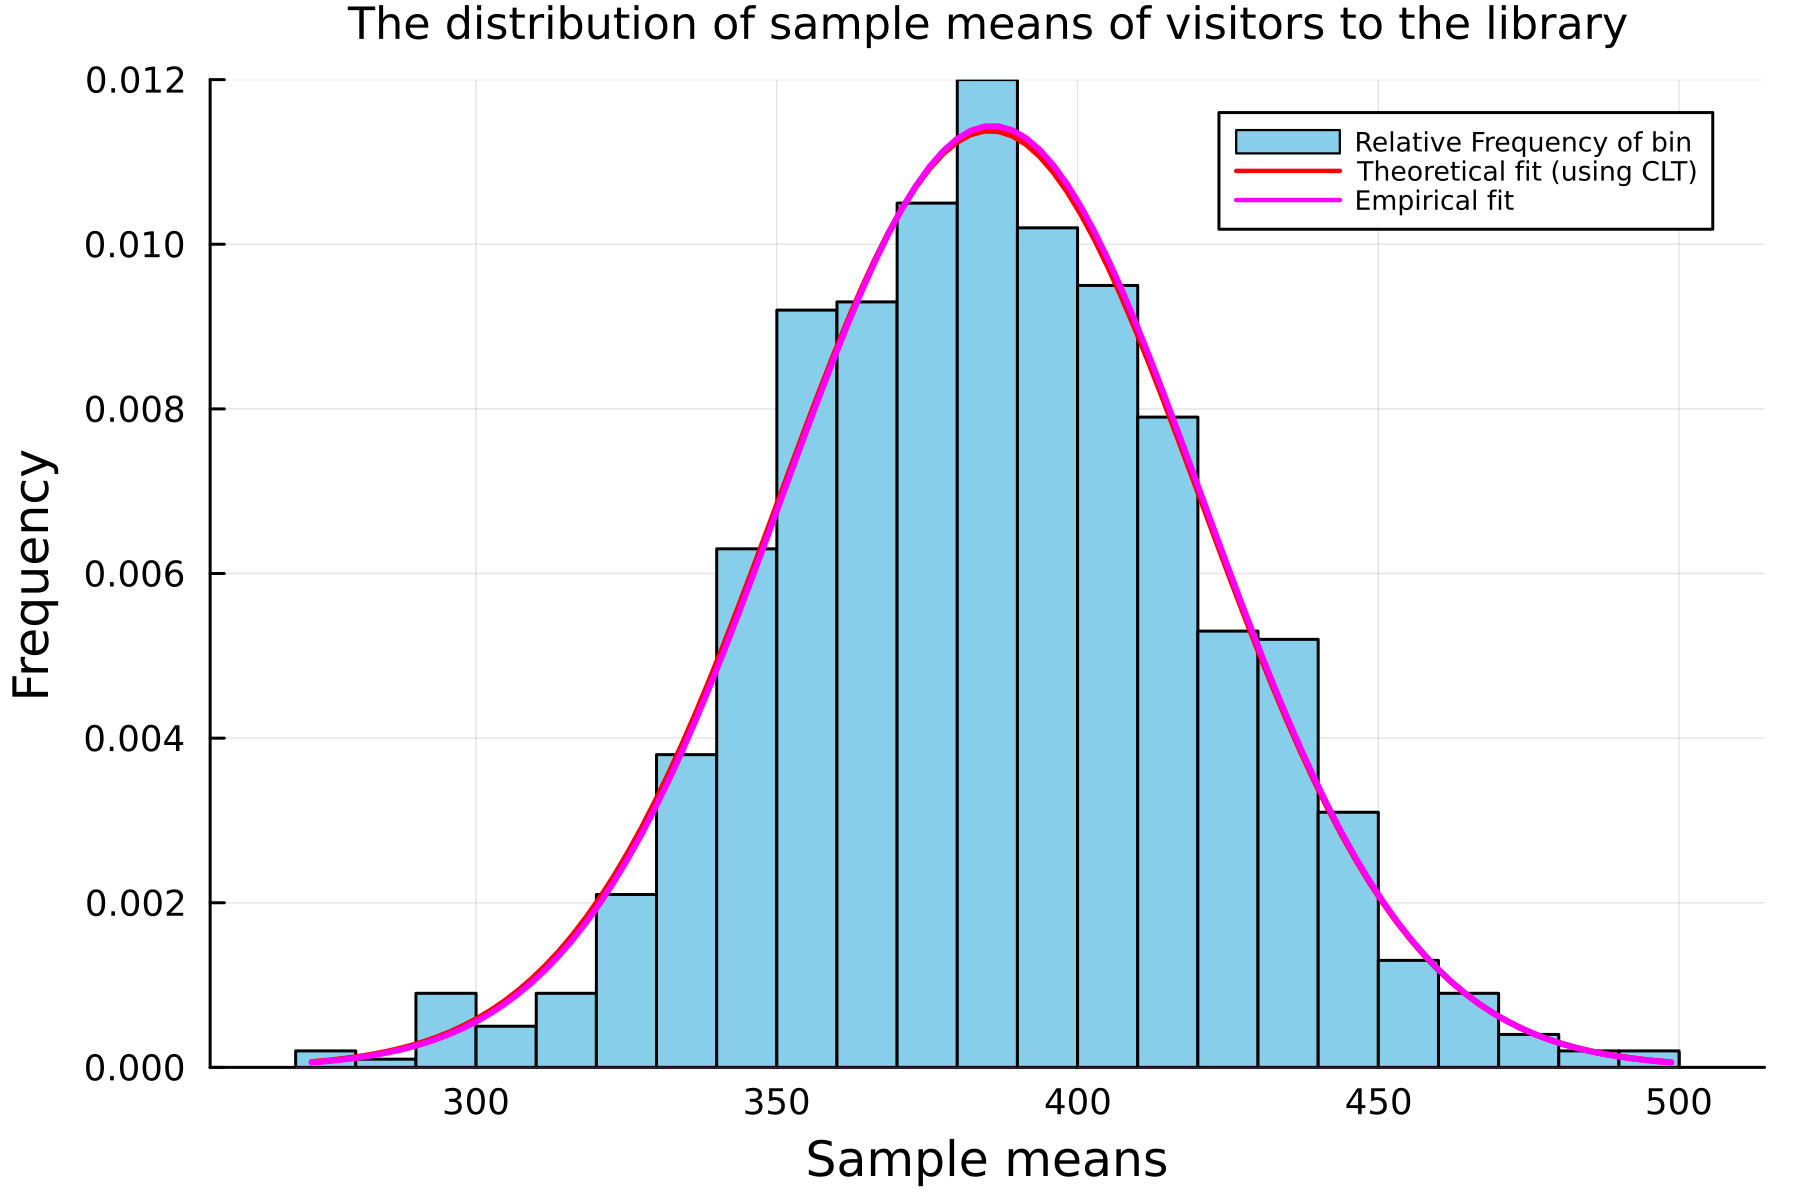

"/Users/dhadheechi/Documents/iith_acads/sem4/applied_stats/stats_project/Distribution of sample means of visitors.png"

In [192]:
p = histogram(sample_means_visitors, bins=30, xlabel="Sample means", ylabel="Frequency",
    title="The distribution of sample means of visitors to the library",
    titlefontsize=10,
    normalize=true,
    color=:skyblue, label="Relative Frequency of bin", legendfontsize=6; dpi=300)
scale_factor = sample_size^0.5
μ, σ = mean_visitors_w_dec, std_visitors_w_dec/scale_factor # pop mean and pop var
μ_hat, σ_hat = mean(sample_means_visitors), std(sample_means_visitors)
x = range(minimum(sample_means_visitors), maximum(sample_means_visitors), length=100)
pdf_vals = pdf.(Normal(μ, σ), x)
pdf_vals_emp = pdf.(Normal(μ_hat, σ_hat), x)

# Overlay the normal distribution
plot!(x, pdf_vals, label="Theoretical fit (using CLT)", lw=2, color=:red)
plot!(x, pdf_vals_emp, label="Empirical fit ", lw=2, color=:magenta)

display(p)
savefig(p, "Distribution of sample means of visitors.png")

In [193]:
μ, σ

(385.43307086614175, 35.04529639243231)

In [194]:
μ_hat, σ_hat

(385.7732000000001, 34.87579773240917)